# What is Feature Engineering?

Welcome to today's lesson on feature engineering in the realm of data science. As we embark on this journey, we will explore the significance of feature engineering, with a focus on text and network data. Feature engineering is the art of transforming raw data into a format that machine learning algorithms can understand, allowing us to extract meaningful patterns and insights.

# What are the goals of Feature Engineering?

- Convert unstructured data into input to learning algorithm.
- Expose the structure of the concept to the learning algorithm.
- Work well with the structure of the model the algorithm will create.
- Balance number of features, complexity of the concept, complexity of model, amount of data.

# 1. Feature Engineering in Text Data

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/SABANCI/Recitations/Feature Engineering not shared/archive.zip')
zip_ref.extractall()
zip_ref.close()

Sentiment analysis dataset with 1.6 million tweets

In [4]:
import pandas as pd

# Importing the dataset
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv',
                      encoding="ISO-8859-1" , names=DATASET_COLUMNS)

df.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
# Removing the unnecessary columns.
df = df[['sentiment','text']]

df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [6]:
#check if there is null values
df.isnull().sum()

sentiment    0
text         0
dtype: int64

In [7]:
df['sentiment'].unique()

array([0, 4])

[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

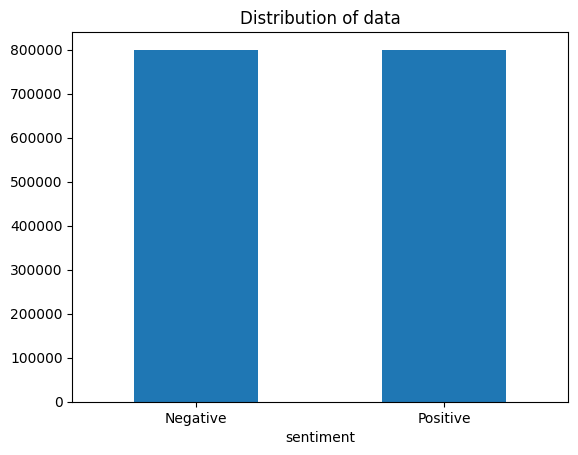

In [8]:
# replace 4 with 1
df['sentiment'] = df['sentiment'].replace(4,1)
# Plotting the distribution for dataset.
ax = df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

## Data Cleaning

Data cleaning is a critical step in preparing text data for machine learning applications. Text data often comes with various challenges such as inconsistent formatting, noise, and irrelevant information. Proper data cleaning ensures that the text data is in a suitable format for analysis and model training. Here's a step-by-step guide to cleaning text data:

1. Handle missing values
2. Convert to lowercase
3. Remove special characters
4. Remove links
5. Tokenization
6. Remove stopwords
7. Lemmatization and stemming
8. Spell checking

### 1. Handle Missing Values

Address any missing or null values in the text data.

In [9]:
df['text'].fillna('', inplace=True)  # Replace missing values with an empty string

### 2. Convert to lowercase

So that the machine learning algorithm does not differentiate the same word whether it is in lowercase or uppercase.

In [10]:
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [11]:
df['text'] = df['text'].apply(lambda x: x.lower())

In [12]:
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,is upset that he can't update his facebook by ...
2,0,@kenichan i dived many times for the ball. man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


### 3. Remove special characters

Special characters most of the times do not affect the sentiment of a text.

In [13]:
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,is upset that he can't update his facebook by ...
2,0,@kenichan i dived many times for the ball. man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [14]:
import re # regular expressions

df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [15]:
df.head()

,sentiment,text
0,0,switchfoot httptwitpiccomyzl awww thats a bum...
1,0,is upset that he cant update his facebook by t...
2,0,kenichan i dived many times for the ball manag...
3,0,my whole body feels itchy and like its on fire
4,0,nationwideclass no its not behaving at all im ...


### 4. Remove links

In [16]:
df['text'] = df['text'].apply(lambda text: re.sub(r'http\S+', '', text))

In [17]:
df.head()

,sentiment,text
0,0,switchfoot awww thats a bummer you shoulda ...
1,0,is upset that he cant update his facebook by t...
2,0,kenichan i dived many times for the ball manag...
3,0,my whole body feels itchy and like its on fire
4,0,nationwideclass no its not behaving at all im ...


### 5. Tokenization

Splits text into smaller units called tokens. Tokens can be words, characters or subwords which is just group of characters.

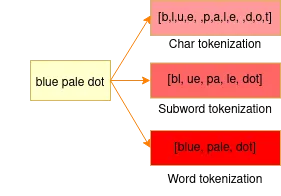

In [18]:
df['tokenized'] = df['text'].apply(lambda x: x.split())
df.head()

,sentiment,text,tokenized
0,0,switchfoot awww thats a bummer you shoulda ...,"[switchfoot, awww, thats, a, bummer, you, shou..."
1,0,is upset that he cant update his facebook by t...,"[is, upset, that, he, cant, update, his, faceb..."
2,0,kenichan i dived many times for the ball manag...,"[kenichan, i, dived, many, times, for, the, ba..."
3,0,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its..."
4,0,nationwideclass no its not behaving at all im ...,"[nationwideclass, no, its, not, behaving, at, ..."


In [19]:
df['tokenized'] = df['tokenized'].apply(lambda x: [word for word in x if x != ''])
df.head()

,sentiment,text,tokenized
0,0,switchfoot awww thats a bummer you shoulda ...,"[switchfoot, awww, thats, a, bummer, you, shou..."
1,0,is upset that he cant update his facebook by t...,"[is, upset, that, he, cant, update, his, faceb..."
2,0,kenichan i dived many times for the ball manag...,"[kenichan, i, dived, many, times, for, the, ba..."
3,0,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its..."
4,0,nationwideclass no its not behaving at all im ...,"[nationwideclass, no, its, not, behaving, at, ..."


### 6. Remove stop words

Eliminating common words that do not add a meaning to the sentence such as the, a, etc.

In [20]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df['tokenized'] = df['tokenized'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
df.head()

,sentiment,text,tokenized
0,0,switchfoot awww thats a bummer you shoulda ...,"[switchfoot, awww, thats, bummer, shoulda, got..."
1,0,is upset that he cant update his facebook by t...,"[upset, cant, update, facebook, texting, might..."
2,0,kenichan i dived many times for the ball manag...,"[kenichan, dived, many, times, ball, managed, ..."
3,0,my whole body feels itchy and like its on fire,"[whole, body, feels, itchy, like, fire]"
4,0,nationwideclass no its not behaving at all im ...,"[nationwideclass, behaving, im, mad, cant, see]"


### 7. Lemmatization and stemming

Reduces words to their base or root form for consistency.

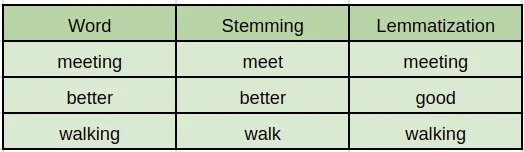

In [22]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

df['tokenized'] = df['tokenized'].apply(lambda filtered_tokens: [lemmatizer.lemmatize(word) for word in filtered_tokens])

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [23]:
df.head()

,sentiment,text,tokenized
0,0,switchfoot awww thats a bummer you shoulda ...,"[switchfoot, awww, thats, bummer, shoulda, got..."
1,0,is upset that he cant update his facebook by t...,"[upset, cant, update, facebook, texting, might..."
2,0,kenichan i dived many times for the ball manag...,"[kenichan, dived, many, time, ball, managed, s..."
3,0,my whole body feels itchy and like its on fire,"[whole, body, feel, itchy, like, fire]"
4,0,nationwideclass no its not behaving at all im ...,"[nationwideclass, behaving, im, mad, cant, see]"


### 8. Spell Checking

Corrects typos and misspelled words.

In [ ]:
!pip install pyspellchecker

This takes so much time :D

In [ ]:
'''from spellchecker import SpellChecker

spell = SpellChecker()

df['tokenized'] = df['tokenized'].apply(lambda tokens: [spell.correction(word) for word in tokens])'''

In [ ]:
df.head()

## Text representation

In machine learning, it's essential to convert text data into a numerical representation because most machine learning algorithms require numerical input. Numerical representation allows algorithms to effectively process and analyze text data. Here are some common techniques for converting text data into a numerical format:

1. Bag-of-words
2. Tf-idf
3. Embeddings

### 1. Bag of words

Represents text as an unordered set of words, ignoring grammar and word order but keeping track of word frequency.

Steps:
1. Create a vocabulary of unique words from the entire corpus.
2. For each document, count the occurrences of each word in the vocabulary.
3. Represent each document as a vector, where each element corresponds to the count of a specific word.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ["This is the first document.", "This document is the second document.", "And this is the third one."]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]]


### 2. Term frequency-Inverse Document Frequency(TF-IDF)

Weights words based on their importance in a document relative to their frequency in the entire corpus.

Steps:
1. Calculate the term frequency (TF) for each word in each document.
2. Calculate the inverse document frequency (IDF) for each word across the entire corpus.
3. Multiply TF by IDF to get the TF-IDF score for each word-document pair.


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ["This is the first document.", "This document is the second document.", "And this is the third one."]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(X.toarray())

[[0.         0.46941728 0.61722732 0.3645444  0.         0.
  0.3645444  0.         0.3645444 ]
 [0.         0.7284449  0.         0.28285122 0.         0.47890875
  0.28285122 0.         0.28285122]
 [0.49711994 0.         0.         0.29360705 0.49711994 0.
  0.29360705 0.49711994 0.29360705]]


### 3. Word Embeddings

Represents words as dense vectors in a continuous vector space, capturing semantic relationships between words.

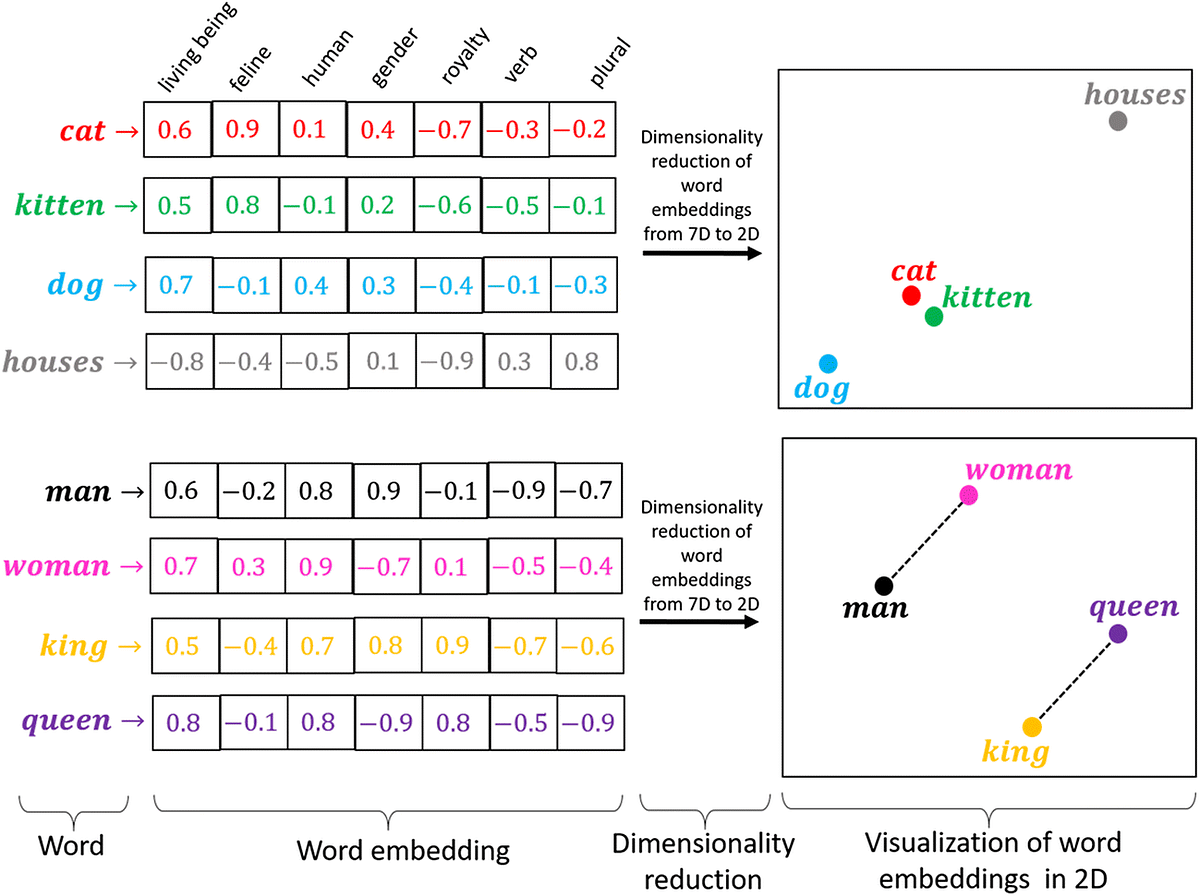

Steps:
1. Pre-trained models like Word2Vec or GloVe are used to generate word embeddings.
2. Each word in a document is replaced with its corresponding vector in the embedding space.

In [26]:
# Using pre-trained Word2Vec embeddings (example with gensim library)
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

nltk.download('punkt')

corpus = ["This is the first document.", "This document is the second document.", "And this is the third one."]
tokenized_corpus = [word_tokenize(doc.lower()) for doc in corpus]

model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

# Example: Get the embedding vector for the word 'document'
print(model.wv['document'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[-8.6204959e-03  3.6656798e-03  5.1890435e-03  5.7413341e-03
  7.4667106e-03 -6.1669527e-03  1.1071442e-03  6.0478016e-03
 -2.8417453e-03 -6.1734831e-03 -4.1064565e-04 -8.3685964e-03
 -5.6015723e-03  7.1051149e-03  3.3512993e-03  7.2244625e-03
  6.8005081e-03  7.5318469e-03 -3.7887152e-03 -5.6384038e-04
  2.3478975e-03 -4.5202258e-03  8.3918469e-03 -9.8565696e-03
  6.7639211e-03  2.9146592e-03 -4.9328543e-03  4.3973904e-03
 -1.7405687e-03  6.7118029e-03  9.9671669e-03 -4.3619340e-03
 -5.9958611e-04 -5.6970902e-03  3.8511248e-03  2.7869588e-03
  6.8903468e-03  6.1010849e-03  9.5382044e-03  9.2721898e-03
  7.9001701e-03 -6.9917394e-03 -9.1567943e-03 -3.5570699e-04
 -3.0986702e-03  7.8943772e-03  5.9379833e-03 -1.5462040e-03
  1.5110098e-03  1.7886526e-03  7.8182593e-03 -9.5115863e-03
 -2.0458201e-04  3.4695806e-03 -9.4097451e-04  8.3801365e-03
  9.0101836e-03  6.5338048e-03 -7.1310432e-04  7.7079539e-03
 -8.5331853e-03  3.2056449e-03 -4.6360181e-03 -5.0893556e-03
  3.5890022e-03  5.37133

These numerical representations enable machine learning models to process and learn patterns from the text data. The choice of representation depends on the specific characteristics of the data and the requirements of the machine learning task.

# Semantic Analysis

In [27]:
df.head()

,sentiment,text,tokenized
0,0,switchfoot awww thats a bummer you shoulda ...,"[switchfoot, awww, thats, bummer, shoulda, got..."
1,0,is upset that he cant update his facebook by t...,"[upset, cant, update, facebook, texting, might..."
2,0,kenichan i dived many times for the ball manag...,"[kenichan, dived, many, time, ball, managed, s..."
3,0,my whole body feels itchy and like its on fire,"[whole, body, feel, itchy, like, fire]"
4,0,nationwideclass no its not behaving at all im ...,"[nationwideclass, behaving, im, mad, cant, see]"


In [28]:
df['text'] = df['tokenized'].apply(lambda x: ' '.join(x))

In [29]:
df = df.drop('tokenized', axis=1)

In [30]:
df.head()

,sentiment,text
0,0,switchfoot awww thats bummer shoulda got david...
1,0,upset cant update facebook texting might cry r...
2,0,kenichan dived many time ball managed save res...
3,0,whole body feel itchy like fire
4,0,nationwideclass behaving im mad cant see


In [31]:
len(df)

1600000

In [32]:
df = df.groupby('sentiment', group_keys=False).apply(lambda x: x.sample(frac=0.01))

In [33]:
df['sentiment'].value_counts()

0    8000
1    8000
Name: sentiment, dtype: int64

In [34]:
features = df['text']
labels = df['sentiment']

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

### 1. Bag of words

In [36]:
vectorizer = CountVectorizer()

x_train_transformed = vectorizer.fit_transform(x_train)
x_test_transformed = vectorizer.transform(x_test)

In [37]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(x_train_transformed, y_train)

SVC()

In [38]:
from sklearn.metrics import confusion_matrix

y_pred = svc.predict(x_test_transformed)

confusion_matrix(y_test, y_pred)

array([[1684,  722],
       [ 577, 1817]])

In [39]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.7366713967159944

### 2. Tf-idf

In [40]:
vectorizer = TfidfVectorizer()

x_train_transformed = vectorizer.fit_transform(x_train)
x_test_transformed = vectorizer.transform(x_test)

In [41]:
y_pred = svc.predict(x_test_transformed)

confusion_matrix(y_test, y_pred)

array([[1384, 1022],
       [ 333, 2061]])

In [42]:
f1_score(y_test, y_pred)

0.752601789300712

### 3. Embeddings

In [43]:
x_train = x_train.apply(lambda x: x.split())
x_train

687671     [fiestywenchyone, yes, need, better, daily, ba...
1431376                         [going, housewarming, party]
538540     [sigh, heading, bed, tmod, isnt, going, anywhere]
987396          [final, week, beginssummer, start, thursday]
481525                            [piggy, got, super, dirty]
                                 ...                        
299222                       [lobosworth, ah, know, u, feel]
905288     [good, morning, coffee, taylor, swift, cd, start]
1263341                                 [happycassie, hello]
616760     [askseesmic, spam, function, isnt, working, sp...
798086     [slow, day, day, dont, much, like, desk, job, ...
Name: text, Length: 11200, dtype: object

In [44]:
# Word2Vec Embeddings
embedding_size = 100
word2vec_model = Word2Vec(sentences=x_train, vector_size=embedding_size, window=5, min_count=1, workers=4)

# Function to calculate document embeddings
def calculate_embedding(tokens):
    embeddings = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if embeddings:
        return pd.DataFrame(embeddings).mean()
    else:
        return pd.Series([0] * embedding_size)

In [45]:
x_train_transformed = []

for sentence in x_train:

  x_train_transformed.append(calculate_embedding(sentence))

In [46]:
x_test_transformed = []

for sentence in x_test:

  x_test_transformed.append(calculate_embedding(sentence))

In [47]:
svc = SVC()

svc.fit(x_train_transformed, y_train)

SVC()

In [48]:
y_pred = svc.predict(x_test_transformed)

confusion_matrix(y_test, y_pred)

array([[   6, 2400],
       [   6, 2388]])

In [49]:
f1_score(y_test, y_pred)

0.6649958228905597

# 2. Feature Engineering in Network Data

**What is network data?**

In machine learning, the term "network data" typically refers to data that represents relationships or interactions between entities. This kind of data is common in applications such as social network analysis, biological networks, communication networks, and more. Network data is often represented in the form of graphs, where nodes represent entities and edges represent the relationships or connections between them.

**What do we do as feature engineering in network data?**

Feature engineering in the context of network data involves the process of creating new features or representations from the raw network data to improve the performance of machine learning models. It aims to extract meaningful information and capture relevant patterns from the network structure.



In this exercise, our goal is to identify common themes in scholarly papers across STEM fields using deep learning techniques. We will be working with data from https://www.kaggle.com/datasets/Cornell-University/arxiv. Once we've identified these general topics, we'll select two of them and explore the connection between their keywords. This will involve extracting features from a created network graph.

## **Install Libraries**

In [50]:
%%capture
!pip install bertopic datasets accelerate bitsandbytes xformers adjustText networkx

## **Import the Dataset**
We will be importing the dataset to the enviroment. However, since the dataset contains over 1.7 million papers, we won't use all of them. Instead, we'll work with a batch of papers for simplicity. You can adjust the size of the batch by using the number_of_items variable.

In [ ]:
from datasets import load_dataset

dataset = load_dataset("CShorten/ML-ArXiv-Papers")["train"]
number_of_items = 5000

# Extract abstracts to train on and corresponding titles
abstracts: list = dataset["abstract"][:number_of_items] if isinstance(number_of_items, int) else dataset["abstract"]
titles: list = dataset["title"][:number_of_items] if isinstance(number_of_items, int) else dataset["title"]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

## **Topic Modeling**

In this section, our goal is to generate topics based on the retrieved papers. To achieve this, we will employ a series of processing steps. Think of these steps as a chain, where the output of one process becomes the input for the next.

**BertTopic**
* ***Embed documents:***

  We start by converting our documents to numerical representations. These models are often optimized for semantic similarity which helps tremendously in our clustering task.

* ***Dimensionality reduction:***

  After having created our numerical representations of the documents we have to reduce the dimensionality of these representations. Cluster models typically have difficulty handling high dimensional data due to the curse of dimensionality.

* ***Cluster Documents:***

  After having reduced our embeddings, we can start clustering our data. For that, we leverage a density-based clustering technique, HDBSCAN. It can find clusters of different shapes and has the nice feature of identifying outliers where possible.

* ***Bag-of-Words:***

  We want a topic representation technique that makes little to no assumption on the expected structure of the clusters.
To do this, we first combine all documents in a cluster into a single document.
we can count how often each word appears in each cluster.
This is called bag-of-words representation in which the frequency of each word in each cluster can be found.

* ***Topic Representations:***

  From the generated bag-of-words representation, we want to know what makes one cluster different from another. Which words are typical for cluster 1 and not so much for all other clusters? To solve this we use modified TF-IDF.


![BertTopic Implementation](https://maartengr.github.io/BERTopic/algorithm/default.svg)

We use the SentenceTransformer library to embed the abstracts into numerical vectors.

In [ ]:
# Embed Documents
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer("BAAI/bge-small-en")
embeddings = embedding_model.encode(abstracts, show_progress_bar=True, batch_size=256)

Batches:   0%|          | 0/20 [00:00<?, ?it/s]

UMAP for dimensionality reduction and HDBSCAN for clustering on the embedded vectors.

In [ ]:
# Dimensionality Reduction, Cluster Documents
from umap import UMAP
from hdbscan import HDBSCAN

umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=150, metric='euclidean', cluster_selection_method='eom', prediction_data=True) # Increase min_cluster_size value if you want less clusters

### KeyBERT
---
* The keyword extraction is done by finding the sub-phrases in a document that are the most similar to the document itself.

![KeyBERT Implementation](https://miro.medium.com/v2/resize:fit:1400/1*QUpU_yzJFKAg4o8nQGD6bA.png)

---

We use the KeyBERTInspired model from BERTopic to extract keywords for each topic.

In [ ]:
from bertopic.representation import KeyBERTInspired

# KeyBERT
keybert = KeyBERTInspired()

# All representation models
representation_model = {
    "KeyBERT": keybert,
}

We initialize a BERTopic model with the following components:

* embedding_model: The SentenceTransformer model used for embedding documents.
* umap_model: The UMAP model for dimensionality reduction.
* hdbscan_model: The HDBSCAN model for clustering.
representation_model: The representation model for extracting keywords.
* top_n_words: The number of top words to consider for each topic.
* verbose: If set to True, it prints verbose output during the training process.

In [ ]:
# Bag-of-Words, Topic Representations
from bertopic import BERTopic

topic_model = BERTopic(

  # Sub-models
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  representation_model=representation_model,

  # Hyperparameters
  top_n_words=10,
  verbose=True
)

# Train model
topics, probs = topic_model.fit_transform(abstracts, embeddings)

2023-12-03 11:56:33,654 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-03 11:56:44,586 - BERTopic - Dimensionality - Completed ✓
2023-12-03 11:56:44,588 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-03 11:56:45,285 - BERTopic - Cluster - Completed ✓
2023-12-03 11:56:45,296 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-03 11:56:48,331 - BERTopic - Representation - Completed ✓


In [ ]:
# Let's look at the extracted keywords and topics
topic_df = topic_model.get_topic_info()
topic_df

,Topic,Count,Name,Representation,KeyBERT,Representative_Docs
0,-1,2670,-1_the_of_and_to,"[the, of, and, to, in, we, is, for, that, on]","[regression, algorithms, prediction, optimizat...","[ In big data image/video analytics, we encou..."
1,0,596,0_the_of_and_to,"[the, of, and, to, in, we, for, is, that, this]","[bayesian, networks, inference, algorithms, mo...",[ One of the basic tasks for Bayesian network...
2,1,339,1_the_of_to_and,"[the, of, to, and, in, we, is, that, on, image]","[convolutional, representations, models, encod...",[ Restricted Boltzmann Machines (RBMs) are ge...
3,2,278,2_the_of_to_in,"[the, of, to, in, and, learning, policy, we, t...","[stochastic, dynamics, bayesian, markov, appro...","[ In this paper, we consider Markov Decision ..."
4,3,271,3_clustering_the_of_to,"[clustering, the, of, to, and, in, data, is, w...","[clustering, clusters, cluster, subspaces, alg...",[ Clustering is considered a non-supervised l...
5,4,261,4_the_of_and_to,"[the, of, and, to, in, is, we, classification,...","[classifiers, datasets, classifier, generaliza...",[ The results from most machine learning expe...
6,5,258,5_the_of_matrix_and,"[the, of, matrix, and, in, to, we, is, for, sp...","[matrices, minimization, matrix, sparse, spars...",[ This paper considers the matrix completion ...
7,6,169,6_the_of_regret_we,"[the, of, regret, we, in, online, to, and, tha...","[stochastic, optimization, optimal, prediction...",[ We address online linear optimization probl...
8,7,158,7_of_the_and_to,"[of, the, and, to, in, topic, we, text, word, ...","[embeddings, corpus, modeling, supervised, res...",[ Many data sets contain rich information abo...


In [ ]:
# Let's pick two topics from the dataset and analyze their relationship by looking the keyword network
chosen_topic_1 = 2
chosen_topic_df_1 = topic_df[topic_df["Topic"] == chosen_topic_1]

chosen_topic_2 = 3
chosen_topic_df_2 = topic_df[topic_df["Topic"] == chosen_topic_2]

In [ ]:
topic_1_keywords = chosen_topic_df_1["KeyBERT"].values[0]
topic_2_keywords = chosen_topic_df_2["KeyBERT"].values[0]

print("Chosen topic 1 keywords: " + ", ".join(topic_1_keywords))
print("Chosen topic 2 keywords: " + ", ".join(topic_2_keywords))

Chosen topic 1 keywords: stochastic, dynamics, bayesian, markov, approximation, learning, model, reinforcement, algorithms, optimal
Chosen topic 2 keywords: clustering, clusters, cluster, subspaces, algorithms, datasets, algorithm, subspace, nodes, matrix


## **Network Creation**

Now that we've generated topics from scholarly papers, our next step is to analyze the relationship between two selected topics. To achieve this, we'll construct a network where nodes represent unique keywords from the extracted topics, and edges indicate the frequency of connections between keywords within a paper. By examining the features of this network graph, we aim to gain insights into the relationships between the chosen topics.

## **Prepare Data**

To establish a network, the initial step involves preparing the data we intend to use. As we are comparing two topics, we need to extract a set of keywords that includes every unique keyword from both given topics. This set of keywords can be generated by taking the union of the keyword lists associated with each topic. Similarly, we need to perform the same procedure on the documents we will be searching for. Hence, we will take the union of the document lists associated with both topics to facilitate a keyword search.

In [ ]:
import networkx as nx
G = nx.Graph()

In [ ]:
import pandas as pd
docs_df = pd.DataFrame({"Document": abstracts, "Topic": topics})

topic_1_docs_df = docs_df[docs_df["Topic"] == chosen_topic_1]
topic_2_docs_df = docs_df[docs_df["Topic"] == chosen_topic_2]

In [ ]:
topic_1_docs = set(topic_1_docs_df["Document"].values.tolist())
topic_2_docs = set(topic_2_docs_df["Document"].values.tolist())

merged_docs = topic_1_docs.union(topic_2_docs)

In [ ]:
merged_keywords = list(set(topic_1_keywords).union(set(topic_2_keywords)))

print(f"Total keyword number of topic 1: {len(topic_1_keywords)}")
print(f"Total keyword number of topic 2: {len(topic_2_keywords)}")

print(f"Total keywod number of merged list: {len(merged_keywords)}")

Total keyword number of topic 1: 10
Total keyword number of topic 2: 10
Total keywod number of merged list: 19


In [ ]:
print(f"Total document number of topic 1: {len(topic_1_docs)}")
print(f"Total document number of topic 2: {len(topic_2_docs)}")

print(f"Total document number of merged list: {len(merged_docs)}")

Total document number of topic 1: 277
Total document number of topic 2: 270
Total document number of merged list: 547


## **Create the Network**

We will generate the network where nodes represent keywords, and there will be an edge if both keywords exist within the same document. We will monitor both the total occurrence of keywords within the documents and the frequencies of connections between keywords.

In [ ]:
# Add nodes to the graph
for keyword in merged_keywords:
  G.add_node(keyword, count=1)

In [ ]:

for doc in merged_docs:
  seen_words_in_doc = [] # To put edges later
  words = doc.strip().split(" ") # Extract the words of document
  # Update the frequencies of nodes
  for keyword in merged_keywords:
    if keyword in words:
      # If search keyword exists inside of the document increment its count by one
      G.nodes[keyword]["size"] += 1
      if keyword not in seen_words_in_doc:
        seen_words_in_doc.append(keyword) # Seen keywords in the document so far

  if len(seen_words_in_doc) >1:
    # Create edges between nodes
    for i in range(len(seen_words_in_doc)-1):
      keyword_1 = seen_words_in_doc[i]
      for j in range(i+1, len(seen_words_in_doc)): # Track the previous iteration and always compare the keyword_1 element with the subsequent words.
        keyword_2 = seen_words_in_doc[j]
        if G.has_edge(keyword_1, keyword_2):
          G[keyword_1][keyword_2]["weight"] += 1
        else:
          G.add_edge(keyword_1, keyword_2, weight=1)

## **Visualize the Network**

In this part of the code, a network graph visualization is being created and displayed using the NetworkX and Matplotlib libraries. The visualization represents relationships between keywords extracted from the machine learning papers in the chosen topics.

<ipython-input-51-a7a9bb35386e>:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mapper, label='Edge Weight')


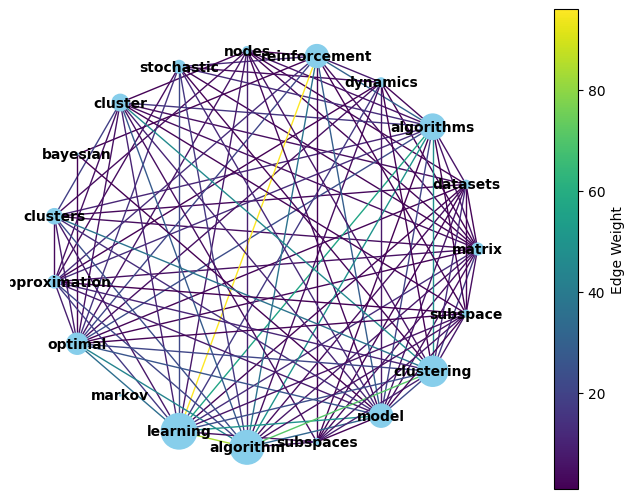

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

color_palette = plt.cm.viridis

node_size_scale_ratio = 1.2 # Adjust it for better node visualization

node_sizes = [G.nodes[n]['size']**node_size_scale_ratio for n in G.nodes]
edge_weights = [G.edges[e]['weight'] for e in G.edges]

# Colorbar Settings
norm = Normalize(vmin=min(edge_weights), vmax=max(edge_weights))
mapper = ScalarMappable(norm=norm, cmap=color_palette)

edge_color = [mapper.to_rgba(w) for w in edge_weights]

pos = nx.circular_layout(G) # Another layout opitons that you can choose to visualize: nx.kamada_kawai_layout, nx.shell_layout, nx.circular_layout,

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=node_sizes, edge_color=edge_color, cmap=color_palette, font_weight='bold', font_size=10)
cbar = plt.colorbar(mapper, label='Edge Weight')

# Show the plot
plt.show()

In summary, this visualization provides a graphical representation of the relationships between keywords in the chosen topics, with node sizes indicating keyword frequencies and edge colors representing the strength of connections between keywords. The colorbar provides a visual reference for interpreting the edge weights in the network graph.

In [ ]:
# Save the network in gefx format to visualize it in Gephi application (Optional)
nx.write_gexf(G, "Article_key_topics.gexf")

## **Extracting Network Features**

**Node Level Features:**

* Degree Centrality

  * Measures the fraction of nodes a node is connected to.
  * High degree centrality indicates a node is well-connected.

* Clustering Coefficient

  * Measures the extent to which neighbors of a node are also connected to each other.
  * High clustering coefficient suggests a node's neighbors are likely interconnected.

* Betweenness Centrality

  * Quantifies the number of times a node acts as a bridge along the shortest paths between other nodes.
  * High betweenness centrality indicates nodes that control information flow.

* Closeness Centrality

  * Measures how close a node is to all other nodes in the network.
  * High closeness centrality indicates a node is reachable and influential.

* Eigenvector Centrality

  * Measures the importance of a node in the network based on the connectivity of its neighbors.
  * High eigenvector centrality indicates well-connected nodes.

**Edge Level Features:**

* Edge Weights
  * Retrieves weights assigned to edges in the graph.
  * Useful for weighted network analysis.

**Graph Level Features:**
* Number of Nodes

* Number of Edges

  * Basic properties indicating the size of the network.

* Density

  * Measures how densely nodes are connected.
  * High density indicates a well-connected network.

* Average Degree

  * Calculated as the sum of degrees divided by the number of nodes.
Provides an average connectivity measure.

* Average Clustering

  * Measures the average of local clustering coefficients.
  * Indicates how connected nodes are in the neighborhood.

* Assortativity

  * Measures the tendency of nodes to connect to similar nodes.
  * Positive assortativity indicates nodes preferentially attach to nodes with similar degrees.

**Path Based Features:**

* Shortest Paths
  * Computes the shortest paths between all pairs of nodes.
  * Useful for understanding the overall connectivity structure of the network.

In [ ]:
# Node Level Features
degree_centrality = nx.degree_centrality(G)
clustering_coefficient = nx.clustering(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Edge Level Features
edge_weights = nx.get_edge_attributes(G, 'weight')

# Graph Level Features
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
density = nx.density(G)
avg_degree = sum(dict(G.degree()).values()) / num_nodes
avg_clustering = nx.average_clustering(G)
assortativity = nx.assortativity.degree_assortativity_coefficient(G)

# Path Based Features
shortest_paths = nx.shortest_path(G)


In conclusion, the provided code demonstrates a comprehensive approach to topic modeling and analysis of machine learning papers from ArXiv using the BERTopic library. The code incorporates techniques such as document embedding with SentenceTransformer, dimensionality reduction with UMAP, and clustering with HDBSCAN. By leveraging the KeyBERTInspired model, it extracts meaningful keywords associated with each topic. The subsequent creation and visualization of a keyword network using NetworkX allow for an insightful exploration of the relationships between different topics. Additionally, the code computes various network features and provides a detailed analysis of chosen topics, offering a holistic understanding of the underlying structure within the dataset. **This script serves as a powerful tool for researchers and practitioners seeking to uncover and interpret latent topics in large collections of machine learning papers.**